In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import fxcmpy
import datetime as dt

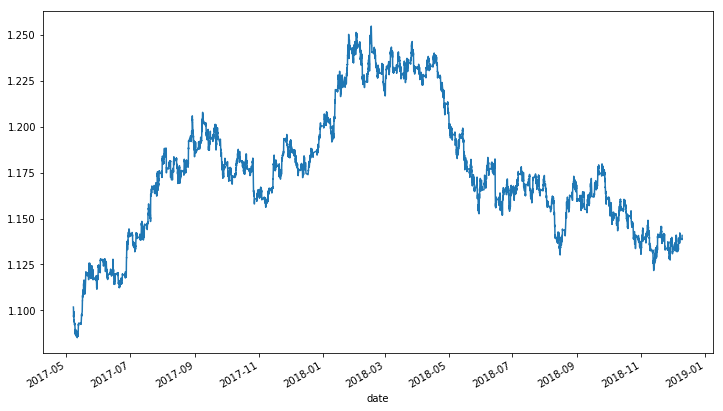

In [2]:
socket = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')
instrument = 'EUR/USD'
data = socket.get_candles(instrument=instrument, period = 'H1', start = dt.datetime(2017,5,7), end = dt.datetime(2018, 12, 10))['bidclose']
data.plot(figsize=(12, 7));

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

C:\Users\vpsuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


date
2018-12-09 20:00:00   -0.000342
2018-12-09 21:00:00    0.000404
2018-12-09 22:00:00    0.000641
2018-12-09 23:00:00    0.000167
2018-12-10 00:00:00    0.000798
Name: bidclose, dtype: float64

In [4]:
u = log_returns.mean()
u

3.443830546211348e-06

In [5]:
var = log_returns.var()
var

8.207554304770642e-07

In [6]:
drift = u - (0.5 * var)
drift

3.0334528309728157e-06

In [7]:
stdev = log_returns.std()
stdev

0.0009059555344922091

In [8]:
norm.ppf(0.75)

0.6744897501960817

In [9]:
days = 1000
iterations = 10
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(days, iterations)))
daily_returns

array([[1.00124145, 0.99867336, 0.99880906, ..., 1.00211849, 1.00149554,
        1.00125238],
       [1.00175717, 0.99948573, 0.99855362, ..., 1.00016133, 0.99989619,
        0.99988772],
       [0.99922717, 1.00011483, 0.99964671, ..., 1.00087462, 0.99873032,
        0.99929204],
       ...,
       [0.99867578, 1.00079508, 1.0002088 , ..., 1.00018714, 1.00032331,
        1.00038154],
       [1.00032766, 0.99976155, 0.99864341, ..., 1.00002277, 0.99971647,
        1.0010483 ],
       [0.99962804, 0.9985426 , 1.00093206, ..., 0.99992949, 1.00070279,
        1.00112109]])

In [10]:
S0 = data.iloc[-1]
S0

1.14082

In [11]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[1.14082, 1.14082, 1.14082, ..., 1.14082, 1.14082, 1.14082],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [12]:
for d in range(1, days):
    price_list[d] = price_list[d - 1] * daily_returns[d]
    
price_list

array([[1.14082   , 1.14082   , 1.14082   , ..., 1.14082   , 1.14082   ,
        1.14082   ],
       [1.14282461, 1.14023331, 1.13916994, ..., 1.14100405, 1.14070158,
        1.1406919 ],
       [1.1419414 , 1.14036425, 1.13876748, ..., 1.142002  , 1.13925325,
        1.13988434],
       ...,
       [1.16193181, 1.10832787, 1.15035887, ..., 1.17433415, 1.12543185,
        1.21313099],
       [1.16231252, 1.10806358, 1.1487983 , ..., 1.17436089, 1.12511276,
        1.21440271],
       [1.16188019, 1.10644869, 1.14986905, ..., 1.17427808, 1.12590348,
        1.21576417]])

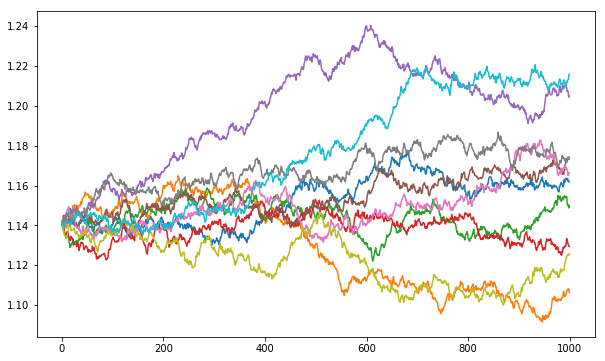

In [13]:
plt.figure(figsize=(10,6))
plt.plot(price_list);